In [12]:
import os
import pickle
import pandas as pd
import numpy as np
import itertools
import warnings
warnings.filterwarnings('ignore')
code_dir = os.path.realpath(os.path.join(os.getcwd(), ".."))
import sys
sys.path.append(code_dir)
from mechaqredo.params import validate_params_dict, default_params_dict
from mechaqredo.sim import run_single_sim,estimate_sensitivity,get_single_derivative
from mechaqredo.generate_scenarios import generate_full_scenario

In [20]:
SIMULATION_LENGHT=365 * 2

sd = {"service_fee_model": 'base', "price_model": 'base', "n_validators": 'base', "n_trx": 'base'}


params=default_params_dict(SIMULATION_LENGHT)
params_dict = generate_full_scenario(
    params_dict=params, scenarios_dict=sd, forecast_length=SIMULATION_LENGHT
)
df=run_single_sim(SIMULATION_LENGHT,params)
df
df.columns

Index(['iteration', 'circ_supply', 'day_burned', 'day_vested', 'day_locked',
       'day_released', 'staking_rewards_vested', 'staking_rewards_ecosystem',
       'total_staking_rewards', 'validators_rewards', 'market_cap',
       'day_burn_fees', 'day_service_fee_locked', 'ecosystem_fund',
       'staking_tvl', 'n_txs', 'token_price', 'service_fees', 'n_validators',
       'day_inflation', 'year_inflation'],
      dtype='object')

In [21]:
df=get_single_derivative(SIMULATION_LENGHT,with_respect_to='tipping_rate',input_params_dict=params,seed=0)
print('A single derivative')
df

A single derivative


,iteration,circ_supply,day_burned,day_vested,day_locked,day_released,staking_rewards_vested,staking_rewards_ecosystem,total_staking_rewards,validators_rewards,...,day_burn_fees,day_service_fee_locked,ecosystem_fund,staking_tvl,n_txs,token_price,service_fees,n_validators,day_inflation,year_inflation
0,0.0,-3.142105e+04,0.0,0.0,31421.052632,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,31421.052632,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN
1,0.0,-6.213066e+04,0.0,0.0,30709.606194,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,30709.606194,3.070961e+04,0.000000,0.0,0.0,0.0,0.0,-0.000073,NaN
2,0.0,-9.254413e+04,0.0,0.0,30418.390921,4.922373,0.0,4.922373,4.922373,2.461187,...,0.0,30418.390921,6.112307e+04,0.000000,0.0,0.0,0.0,0.0,-0.000072,NaN
3,0.0,-1.235329e+05,0.0,0.0,30998.598310,9.804453,0.0,9.804453,9.804453,4.902226,...,0.0,30997.367717,9.211064e+04,1.230593,0.0,0.0,0.0,0.0,-0.000074,NaN
4,0.0,-1.558332e+05,0.0,0.0,32315.071175,14.785811,0.0,14.785811,14.785811,7.392906,...,0.0,32312.620062,1.244085e+05,3.681707,0.0,0.0,0.0,0.0,-0.000077,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.0,-2.096738e+07,0.0,0.0,24911.781777,2301.605819,0.0,1848.470078,1848.470078,924.235039,...,0.0,24450.160293,2.092773e+07,8231.060950,0.0,0.0,0.0,0.0,-0.000022,-0.006848
726,0.0,-2.098919e+07,0.0,0.0,24118.331439,2304.024214,0.0,1850.449315,1850.449315,925.224658,...,0.0,23656.213920,2.094953e+07,8239.603571,0.0,0.0,0.0,0.0,-0.000021,-0.006835
727,0.0,-2.101099e+07,0.0,0.0,24106.751995,2306.381024,0.0,1852.358318,1852.358318,926.179159,...,0.0,23644.139666,2.097132e+07,8248.193193,0.0,0.0,0.0,0.0,0.000058,-0.006743
728,0.0,-2.103240e+07,0.0,0.0,23712.254517,2308.745599,0.0,1854.266066,1854.266066,927.133033,...,0.0,23249.164937,2.099272e+07,8256.803240,0.0,0.0,0.0,0.0,-0.000021,-0.006805


In [22]:
with_respect_to='staking_renewal_rate'
h=params[with_respect_to]*0.01
params[with_respect_to]  
    


0.8

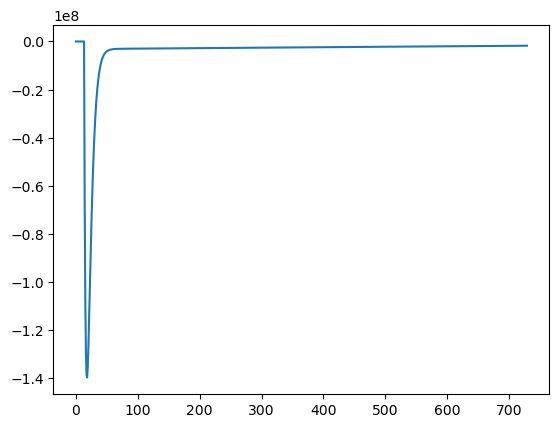

In [25]:
    seed=0
    np.random.seed(seed)
    df0=run_single_sim(SIMULATION_LENGHT, params)
    np.random.seed(seed)
    params[with_respect_to]+=h
    df1=run_single_sim(SIMULATION_LENGHT, params)
    params[with_respect_to]-=h
    plt.plot((-df0['circ_supply']+df1['circ_supply'])/h)
    

In [4]:
df=estimate_sensitivity(SIMULATION_LENGHT,with_respect_to='tipping_rate',input_params_dict=params,N=1000)


Estimating sensitivity wrt tipping_rate


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.74it/s]


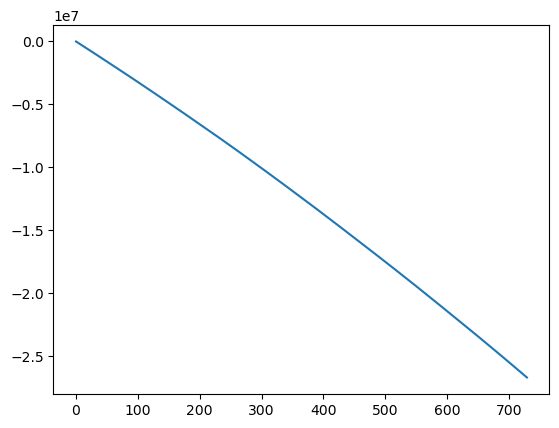

In [5]:
import matplotlib.pyplot as plt
plt.plot(df['circ_supply'])

In [7]:
Ntr=20
tr=np.linspace(0.1,0.95,Ntr)
time=np.arange(SIMULATION_LENGHT)
derivatives=np.zeros((len(tr),len(time)))
import tqdm
for i in tqdm.tqdm(range(Ntr)):
    params=default_params_dict(SIMULATION_LENGHT)
    params_dict = generate_full_scenario(
    params_dict=params, scenarios_dict=sd, forecast_length=SIMULATION_LENGHT)
    
    params['protocol_fee_rate']=0.1*np.random.random()
    params['min_stake_amount']=5000*np.random.random()
    params["min_stake_duration"]= np.randint(56)
    params["validator_reward_share"]=np.random.random()
    
    params['tipping_rate']=tr[i]
    df=estimate_sensitivity(SIMULATION_LENGHT,with_respect_to='staking_renewal_rate',input_params_dict=params,N=100)
    derivatives[i]=df['circ_supply'].values


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.07it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.55it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.48it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.72it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.69it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 65.95it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.63it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.51it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.11it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.49it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.45it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.65it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 67.80it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.70it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.81it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.87it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.70it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.81it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.90it/s]


Estimating sensitivity wrt tipping_rate


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.70it/s]


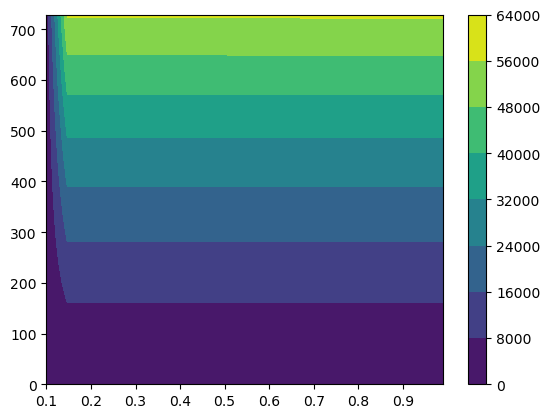

In [8]:
TR,TIME=np.meshgrid(tr,time)
p=plt.contourf(TR,TIME,derivatives.T)
plt.colorbar(p)